In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
#import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec

In [ ]:
cd '/content/drive/My Drive/'

/content/drive/My Drive


In [ ]:
# Importing dataset
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [ ]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [ ]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)



In [ ]:
# Preprocessing training data
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

# Creating datasets
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)


dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [ ]:
text_reviews = [str(r) for r in reviews_text_df['reviews_text'].values]

sentences = []

for review in text_reviews:
    words = text_to_word_sequence(review)
    sentences.append(words)

embeddings_model = Word2Vec(sentences, min_count=1, sg=1, size=128)
words = list(embeddings_model.wv.vocab)
print('{} WORDS '.format(len(words)))
print('Printing first 100:')
print(words[:100])

76904 WORDS 
Printing first 100:
['hater', 'ukjente', 'fixe', 'ekstrabetalinger', 'hate', 'unknown', 'ekstra', 'costs', 'claimed', 'at', 'check', 'out', 'stars', 'maybe', 'years', 'ago', 'rooms', 'breakfast', 'and', 'especially', 'the', 'absolutely', 'fantastic', 'staff', 'overall', 'a', 'wonderful', 'stay', 'some', 'of', 'could', 'not', 'help', 're', 'local', 'parking', 'didn', 't', 'seem', 'too', 'interested', 'in', 'helping', 'efficient', 'on', 'room', 'was', 'nice', 'proximity', 'to', 'stratford', 'station', 'sporting', 'precinct', 'excellent', 'slightly', 'expensive', 'but', 'worth', 'it', 'great', 'location', 'sized', 'very', 'friendly', 'despite', 'having', 'paid', 'for', 'advance', 'charged', 'my', 'card', 'an', 'additional', 'act', 'as', 'credits', 'extra', 'hotel', 'food', 'drink', 'i', 'feel', 'this', 'necessary', 'we', 'would', 'have', 'gladly', 'if', 'needed', 'anything', 'takes', 'hours', 'money', 'reappear', 'your', 'account', 'after']


In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(text_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

76905

In [ ]:
vocabSize = len(tokenizer.word_index) + 1
print(vocabSize)

# Recreating embeddings index based on Tokenizer vocabulary
word2vec_vocabulary = embeddings_model.wv.vocab
embeddingIndex = dict()
counter = 0
for word, i in tokenizer.word_index.items():
    if word in word2vec_vocabulary :
        embeddingIndex[word] = embeddings_model[word]
    else:
        counter += 1

print("{} words without pre-trained embedding!".format(counter))
    
# Prepare embeddings matrix
embeddingMatrix = zeros((vocabSize, 128))
for word, i in tokenizer.word_index.items():
    embeddingVector = embeddingIndex.get(word)
    if embeddingVector is not None:
        embeddingMatrix[i] = embeddingVector

76905


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


0 words without pre-trained embedding!


In [ ]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(text_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40): 
        words = words[:40]
        text_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=40, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import GRU
from keras.layers import LSTM

from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from sklearn import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
maxlen=40
max_features=40000
batch_size=32
filters = 256
pool_size = 2
gru_node = 256

model=keras.models.Sequential()
model.add(keras.layers.Embedding(vocabSize, 128, weights=[embeddingMatrix], input_length=40, trainable=True))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(Conv1D(filters, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, return_sequences=True, recurrent_dropout=0.2))
model.add(LSTM(gru_node, recurrent_dropout=0.2))
model.add(Dense(128,activation='relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 40, 128)           9843840   
_________________________________________________________________
dropout_3 (Dropout)          (None, 40, 128)           0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 39, 256)           65792     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 19, 256)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 18, 256)           131328    
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 9, 256)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 8, 256)           

In [ ]:
model.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=5,
                              batch_size=128,
                              verbose=2)

predicted = model.predict(X_test)

predicted = np.argmax(predicted, axis=1)
print(metrics.classification_report(y_test, predicted))

Train on 11259 samples, validate on 5546 samples
Epoch 1/5
 - 36s - loss: 0.1002 - accuracy: 0.9680 - val_loss: 0.2259 - val_accuracy: 0.9210
Epoch 2/5
 - 36s - loss: 0.0960 - accuracy: 0.9686 - val_loss: 0.2066 - val_accuracy: 0.9286
Epoch 3/5
 - 36s - loss: 0.0815 - accuracy: 0.9727 - val_loss: 0.2218 - val_accuracy: 0.9272
Epoch 4/5
 - 36s - loss: 0.0791 - accuracy: 0.9754 - val_loss: 0.2818 - val_accuracy: 0.9245
Epoch 5/5
 - 36s - loss: 0.0730 - accuracy: 0.9764 - val_loss: 0.2607 - val_accuracy: 0.9259
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2509
           1       0.95      0.91      0.93      3037

    accuracy                           0.93      5546
   macro avg       0.92      0.93      0.93      5546
weighted avg       0.93      0.93      0.93      5546



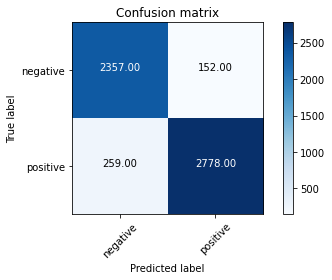

In [ ]:
predictions = model.predict_classes(X_test)

cm = confusion_matrix(y_test, predictions, labels=[0,1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [ ]:
 loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

5546/5546 [==============================] - 3s 508us/step
Test Loss: 0.26071541837365875
Test Accuracy: 0.9258925318717957
